In [1]:
import gensim
import nltk
import sklearn
import pandas as pd
import numpy as np
import matplotlib

import re
import codecs
import itertools
import matplotlib.pyplot as plt

print ('DONE [IMPORT NECESSARY LIBRARIES]')

C:\Users\Parth\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


DONE [IMPORT NECESSARY LIBRARIES]


In [2]:
## MANDATORY 
## [ETL] Import Data

input_file = codecs.open("C://Users//Parth//Desktop//NLP//socialmedia_relevant_cols.csv", "r",encoding='utf-8', errors='replace')

# read_csv will turn CSV files into dataframes
questions = pd.read_csv(input_file)

#let's give names to the columns of our dataframe
questions.columns=['text', 'choose_one', 'class_label']

print ('DONE - [ETL] Import Data')

DONE - [ETL] Import Data


In [4]:
## [EDA] Explore Imported Data

questions.head()
#questions.head(10)
#questions.tail()
#questions.describe()

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1


## Cleaning the dataset
You took a look at the data... When cleaning the dataset, think of the following questions:

What could confuse a computer? It probably doesn't know the difference between 'This' and 'this'. So let's turn everything into lowercase.

Which words or phrases are irrelevant? Would a URL tell us much? Probably not, so let's remove all URLs.

In [5]:
## MANDATORY 
## [PREPROCESS] Text Cleaning

def standardize_text(df, text_field):
    # normalize by turning all letters into lowercase
    df[text_field] = df[text_field].str.lower()
    # get rid of URLS
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"http\S+", "", elem))  
    return df

# call the text cleaning function
clean_questions = standardize_text(questions, "text")

print ('DONE - [PREPROCESS] Text Cleaning')

DONE - [PREPROCESS] Text Cleaning


In [6]:
## [EDA] Explore Cleaned Data

clean_questions.head()

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this #earthquake m...,Relevant,1
2,"heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask. canada,Relevant,1


Label Representation
Let's look at our class balance; are all labels represented fairly?

In [8]:
# [EDA] Explore Class Labels

clean_questions.groupby("choose_one").count()


,text,class_label
choose_one,,
Can't Decide,16,16
Not Relevant,6187,6187
Relevant,4673,4673


In [9]:
## [EDA] Explore Class Labels

clean_questions.groupby("class_label").count()

,text,choose_one
class_label,,
0,6187,6187
1,4673,4673
2,16,16


We can see our classes are pretty balanced, with a slight oversampling of the "Irrelevant" class.

## Tokenization
What is the unit of analysis for this exercise? We should probably analyze words instead of sentences...

We'll use regex to tokenize sentences to a list of words.

We'll then analyze Tweet lengths and inspect our data a little more to validate results.

In [10]:
## MANDATORY
## [PREPROCESS] Tokenize

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()

,text,choose_one,class_label,tokens
0,just happened a terrible car crash,Relevant,1,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this #earthquake m...,Relevant,1,"[our, deeds, are, the, reason, of, this, earth..."
2,"heard about #earthquake is different cities, s...",Relevant,1,"[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask. canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]"


In [11]:
## [EDA] Explore words and sentences

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]

sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

158663 words total, with a vocabulary size of 21327


In [12]:
# [EDA] Explore Vocabulary

# What are the words in the vocabulary
print (VOCAB[0:100])

# What are the most commonly occuring words
from collections import Counter
count_all_words = Counter(all_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

['0', '00', '000', '0000', '00am', '00end', '00pm', '01', '02', '0215', '02pm', '03', '030', '032', '033', '034', '039', '04', '05', '0518', '05th', '06', '060', '061', '06jst', '07', '08', '0840728', '0853', '087809233445', '0880', '09', '0992', '0l', '0npzp', '1', '10', '100', '1000', '10000', '100000', '1000s', '1008pla', '1008planet', '100mb', '100nd', '100s', '101', '1017', '1023', '1028', '103', '105', '106', '1061thetwister', '107', '109', '10am', '10k', '10km', '10m', '10news', '10pm', '10th', '10w', '10x', '11', '11000', '11000000', '111020', '1115', '11211', '114', '1141', '1145', '1148', '115', '115film', '1179', '118', '119', '119000', '11am', '11th', '12', '120', '1200', '12000', '120000', '1200000', '120v', '1233newcastle', '1236', '124', '1245z', '125', '126', '129', '12am', '12hr']


[('the', 4621),
 ('a', 3109),
 ('to', 2837),
 ('in', 2808),
 ('of', 2610),
 ('i', 2511),
 ('and', 2023),
 ('s', 1403),
 ('is', 1392),
 ('you', 1287),
 ('for', 1245),
 ('on', 1238),
 ('it', 1141),
 ('my', 976),
 ('that', 853),
 ('with', 797),
 ('by', 777),
 ('at', 748),
 ('t', 723),
 ('this', 705),
 ('from', 614),
 ('are', 600),
 ('be', 596),
 ('was', 553),
 ('_', 535),
 ('have', 513),
 ('amp', 510),
 ('like', 493),
 ('as', 485),
 ('up', 471),
 ('just', 459),
 ('we', 449),
 ('me', 445),
 ('m', 439),
 ('but', 436),
 ('so', 432),
 ('not', 431),
 ('your', 429),
 ('out', 412),
 ('no', 401),
 ('all', 381),
 ('will', 372),
 ('after', 370),
 ('fire', 367),
 ('when', 365),
 ('can', 362),
 ('an', 358),
 ('if', 353),
 ('he', 351),
 ('has', 341),
 ('get', 336),
 ('new', 329),
 ('they', 327),
 ('more', 325),
 ('via', 325),
 ('about', 312),
 ('what', 311),
 ('2', 311),
 ('now', 309),
 ('or', 294),
 ('how', 293),
 ('news', 289),
 ('people', 285),
 ('one', 283),
 ('who', 271),
 ('there', 266),
 ('over

# Preparing Training and Test Data
We need to split our data into a training set and a test set. Later on we will 'fit' our model using the training set. We will use the test set to ask the model to predict the labels, and we'll then compare the predicted labels against the actual test set labels

In [13]:
from sklearn.model_selection import train_test_split

list_corpus = clean_questions["text"]
list_labels = clean_questions["class_label"]

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

print("Training set: %d samples" % len(X_train))
print("Test set: %d samples" % len(X_test))

Training set: 8700 samples
Test set: 2176 samples


In [14]:
## [CLASSIFY] Check Data to be Trained

print (X_train[:10])

2354      ��@thehighfessions: 'my friend came to school...
9734     dtn india: rly tragedy in mp: some live to rec...
9332     @ddnewslive @nitishkumar  and @arvindkejriwal ...
10831    three days off from work and they've pretty mu...
3125     malaysian officials say debris found on reunio...
9836     @arobotlegion so be it. you can't tell an oppr...
302                                  annihilated abs . ?? 
9872     america like south africa is a traumatised sic...
4638     get emergency edmonton locksmith services  in ...
9309     3 things all affiliate marketers need to survi...
Name: text, dtype: object


In [15]:
## [CLASSIFY] Check the Training Labels

print (y_train[:10])

2354     0
9734     1
9332     0
10831    0
3125     1
9836     0
302      1
9872     0
4638     0
9309     0
Name: class_label, dtype: int64


## Embedding
Machine Learning on images can use raw pixels as inputs. Fraud detection algorithms can use customer features. What can NLP use?

A natural way to represent text for computers is to encode each character individually, this seems quite inadequate to represent and understand language. Our goal is to first create a useful embedding for each sentence (or tweet) in our dataset, and then use these embeddings to accurately predict the relevant category.

Here, you are given 3 different methods. Which one is best?

## 1. Bag of Words Counts
The simplest approach we can start with is to use a bag of words model. A bag of words just associates an index to each word in our vocabulary, and embeds each sentence as a list of 0s, with a 1 at each index corresponding to a word present in the sentence.

In [17]:
## MANDATORY FOR BOW EMBEDDING
## [EMBEDDING] Tranform Tweets to BOW Embedding

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+')

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
print(bow["test"][0].shape)

(8700, 18738)
(2176, 18738)


## 2. TFIDF Bag of Words
Let's try a slightly more subtle approach. On top of our bag of words model, we use a TF-IDF (Term Frequency, Inverse Document Frequency) which means weighing words by how frequent they are in our dataset, discounting words that are too frequent, as they just add to the noise.

In [19]:
## MANDATORY FOR TFIDF EMBEDDING
## [EMBEDDING] Transform Tweets to TFIDF Embedding

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

print(tfidf["train"][0].shape)
print(tfidf["test"][0].shape)

(8700, 18738)
(2176, 18738)


C:\Users\Parth\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


## 3. Word2Vec - Capturing semantic meaning
Our first models have managed to pick up on high signal words. However, it is unlikely that we will have a training set containing all relevant words. To solve this problem, we need to capture the semantic meaning of words. Meaning we need to understand that words like 'good' and 'positive' are closer than apricot and 'continent'.

Word2vec is a model that was pre-trained on a very large corpus, and provides embeddings that map words that are similar close to each other. A quick way to get a sentence embedding for our classifier, is to average word2vec scores of all words in our sentence

In [22]:
## MANDATORY FOR WORD2VEC EMBEDDING
## [EMBEDDING] Load Word2Vec Pretrained Corpus

word2vec_path = "C:\\Users\\Parth\\Desktop\\NLP\\GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

print ('DONE [Load Word2Vec Pretrained Corpus]')

DONE [Load Word2Vec Pretrained Corpus]


In [23]:
## MANDATORY FOR WORD2VEC EMBEDDING
## [EMBEDDING] Get Word2Vec values for a Tweet

def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions_tokens, generate_missing=False):
    embeddings = clean_questions_tokens.apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

# Call the functions
embeddings = get_word2vec_embeddings(word2vec, clean_questions['tokens'])

print ('[EMBEDDING] Get Word2Vec values for a Tweet')

[EMBEDDING] Get Word2Vec values for a Tweet


In [24]:
## MANDATORY FOR WORD2VEC EMBEDDING
## [CLASSIFY] Word2Vec Train Test Split

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(embeddings, list_labels, 
                                                                    test_size=0.2, random_state=40)

w2v = dict()
w2v["train"] = (X_train_w2v, y_train_w2v)
w2v["test"]  = (X_test_w2v, y_test_w2v)

print ('DONE - [CLASSIFY] Word2Vec Train Test Split]')

DONE - [CLASSIFY] Word2Vec Train Test Split]


# The Classifiers
We are providing you with 4 different classification models; which one is best?

## 1. Logistic Regression classifier
Starting with a logistic regression is a good idea. It is simple, often gets the job done, and is easy to interpret.

In [26]:
## MANDATORY FOR LOGISTIC REGRESSION CLASSIFIER
## [CLASSIFY] Initialize Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

print ('DONE - [CLASSIFY] Initialize Logistic Regression')

DONE - [CLASSIFY] Initialize Logistic Regression


## 2. Linear Support Vector Machine classifier
Common alternative to logistic regression

In [27]:
## MANDATORY FOR SUPPORT VECTOR MACHINE CLASSIFIER
## [CLASSIFY] Initialize Support Vector Machine Classifier

from sklearn.svm import LinearSVC

lsvm_classifier = LinearSVC(C=1.0, class_weight='balanced', multi_class='ovr', random_state=40)

print ('[CLASSIFY] Initialize Support Vector Machine Classifier')

[CLASSIFY] Initialize Support Vector Machine Classifier


# 3. Naive Bayes
A probabilistic alternative.

In [28]:
## MANDATORY FOR NAIVE BAYES CLASSIFIER
## [CLASSIFY] Initialize Naive Bayes
## NOTE - Does not work with Word2Vec Embedding

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

print ('DONE - [CLASSIFY] Initialize Naive Bayes')

DONE - [CLASSIFY] Initialize Naive Bayes


## 4. Decision Tree
Classifier that partitioning the data into subsets that contain instances with similar values (homogenous).

In [29]:
## MANDATORY FOR DECISION TREE
## [CLASSIFY] Initialize Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)

print ('DONE - [CLASSIFY] Initialize Decision Tree')

DONE - [CLASSIFY] Initialize Decision Tree


## Evaluation - Preparing your metrics
Now that our data is clean and prepared and trasformed into a format the machine can understand, let's dive in to the machine learning part.

But before anything else, let us define some functions that will help us assess the accuracy of our trained models.



In [30]:
# MANDATORY 
## [EVALUATE] Prepare Metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

print ('DONE - [EVALUATE] Prepare Metrics')

DONE - [EVALUATE] Prepare Metrics


Also define a function that plots a Confusion Matrix which helps us see our false positives and false negatives

In [32]:
## MANDATORY
## [EVALUATE] Confusion Matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

print ('DONE - [EVALUATE] Confusion Matrix')


DONE - [EVALUATE] Confusion Matrix


First we choose the Embedding. For this Kernel we choose Bag of Words (bow)
Other choices are tfidf (Term Frequency Inverse Document Frequency) and w2v (Word2Vec)

In [33]:
## MANDATORY 
## [EMBEDDING] CHOOSE EMBEDDING

embedding = bow                  # bow | tfidf | w2v

print ('DONE - [EMBEDDING] CHOOSE EMBEDDING')

DONE - [EMBEDDING] CHOOSE EMBEDDING


Then we choose the Classifier. For this Kernel we choose Logistic Regression (lr_classifier)
Other choices are lsvm_classifier (Linear Support Vector Machine) and nb_classifier (Naive Bayes)

In [34]:
## MANDATORY 
## [CLASSIFY] CHOOSE CLASSIFIER

classifier = lr_classifier     # lr_classifier | lsvm_classifier | nb_classifier| dt_classifier

print ('DONE - [CLASSIFY] CHOOSE CLASSIFIER')

DONE - [CLASSIFY] CHOOSE CLASSIFIER


Then we Fit and Predict on our Test Data so we can score our Model.

In [36]:
## MANDATORY 
## [CLASSIFY] Train Classifier on Embeddings

classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])

print ('DONE - [CLASSIFY] Train Classifier on Embeddings')

DONE - [CLASSIFY] Train Classifier on Embeddings


We score our model.
We use the mean F1 score to score our Model.

Recall is the ability of the classifcation model to find all the data points of interest in a dataset.

Precision is the ability of a classification model to identify only the relevant data points.

While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

Taking both metrics into account, we have the mean F1 score.

In [37]:
# MANDATORY 
## [EVALUATE] Score chosen model

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.765, precision = 0.763, recall = 0.765, f1 = 0.763


A metric is one thing, but in order to make an actionnable decision, we need to actually inspect the kind of mistakes our classifier is making. Let's start by looking at the confusion matrix.

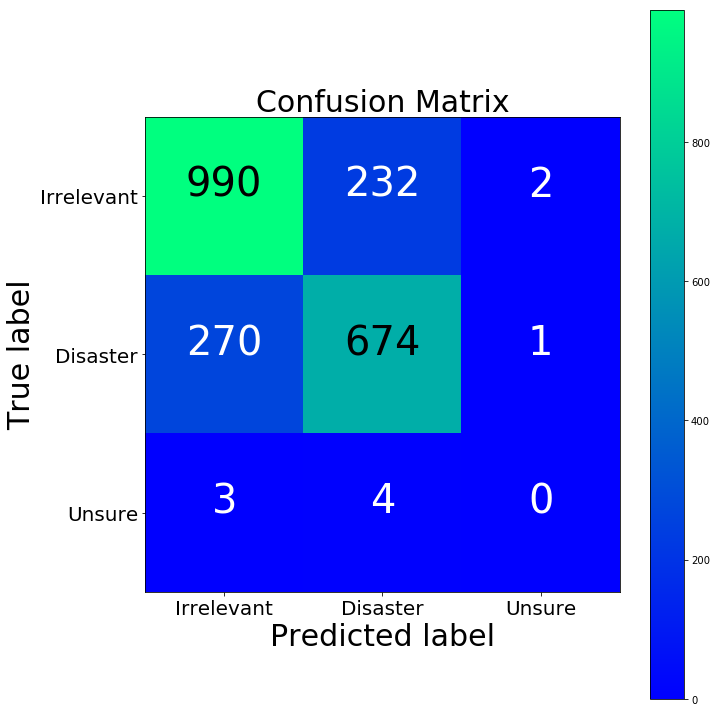

In [38]:
## MANDATORY 
## [EVALUATE] Confusion matrix for chosen model

cm = confusion_matrix(embedding["test"][1], y_predict)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster', 'Unsure'], normalize=False, title='Confusion Matrix')
plt.show()

Now let us run this model on the competition data set
We need to read the test competion data
We need to Vectorize the Tweets with our Embedding of Choice (Count Vectorizer, TFIDF, Word2Vec)
We need to classify the vectorized Tweets with our Classifier of choice (Logistic, Linear SVM, , Naive Bayes)

In [40]:
## MANDATORY for COMPETITION
## [ETL] Load competition Test Data

test_X = pd.read_csv('C://Users//Parth//Desktop//NLP//test.csv')
test_corpus = test_X["Tweet"]
test_Id = test_X["Id"]

print ('DONE [ETL] Load competition Test Data')

DONE [ETL] Load competition Test Data


In [41]:
## MANDATORY for COMPETITION
## [PREPROCESS] Tokenize Competition Data

# tokenize the test_corpus
test_corpus_tokens = test_corpus.apply(tokenizer.tokenize)

print ('[PREPROCESS] Tokenize Competition Data')

[PREPROCESS] Tokenize Competition Data


#### Apply Word Embeddings to the Tweets
#### For Bag of Words:
count_vectorizer.transform(test_corpus)

#### For TFIDF
tfidf_vectorizer.transform(test_corpus)

#### For Word2Vec
get_word2vec_embeddings(word2vec, test_corpus_tokens)

In [42]:
## MANDATORY for COMPETITION 
## [EMBEDDING] Apply Chosen Embeddings to the Tweets

vectorized_text = dict()
vectorized_text['test']  = (count_vectorizer.transform(test_corpus))  # see options in the above cell

print ('DONE - [EMBEDDING] Apply Chosen Embeddings to the Tweets')

DONE - [EMBEDDING] Apply Chosen Embeddings to the Tweets


Classify the Vectorized Tweets with our Classifier of choice

In [43]:
## MANDATORY for COMPETITION  
## [CLASSIFY] Apply Chosen Classifier to the Embedding

embedding = vectorized_text                
classifier = lr_classifier     # lr_classifier | lsvm_classifier | nb_classifier | dt_classifier
predicted_sentiment = classifier.predict(embedding['test']).tolist()

print ('DONE - [CLASSIFY] Apply Chosen Classifier to the Embedding')

DONE - [CLASSIFY] Apply Chosen Classifier to the Embedding


In [44]:
## MANDATORY for COMPETITION  
## [PREPARE SUBMISSION]


results = pd.DataFrame(
    {'Id': test_Id,
     'Expected': predicted_sentiment
    })

# Write your results for submission.
# Make sure to put in a meaningful name for the 'for_submission.csv 
# to distinguish your submission from other teams.

results.to_csv('for_submission_sample.csv', index=False)

print ('DONE - [PREPARE SUBMISSION]')

DONE - [PREPARE SUBMISSION]
